# Music & Mental Health | Trying to predict music effects
_______________________________________

## Data Transformation / Data Visualisation / Feature Engineering

* What **aggregations** to do?
* What **plots** to visualize? --> matplotlib + seaborn + kaggle

## Trying to discover trends / predict music effects:

1) What is the connection between **music use** and its effect on **disease**(mental health)?
2) What is the connection between **music preference** and effect on **disease**(mental health)? 
_________
* Granularity --> fav genre as first, related statistcal, individualy fre compare to disease
_________
3) What is the connection between **music genre** and effect on **disease**(mental health)?
4) Which **disease**(mental health) experiences the **greatest effect** from music? 
_________
* Plot difference between mental health and anxiety
_________
5) Can I make helpful recommendations based on these findings? 
6) What **age** (range) experiences the most the **diseases**. What is there music effect? What music genre do they listen to?
What is there music use?

_________

* What is the **mean** anxiety (1.0-10.0) level (numerical) for **every possible music effect** (Improve, No effect, Worsen)(categorical)
* What is the **mean** depression (1.0-10.0) level (numerical)
* What is the **mean** insomnia (1.0-10.0) level (numerical)
* What is the **mean** OCD (1.0-10.0) level (numerical)

_________

* More than 2 poss valuebale --> statistical test ?

_________

TO DO: 

- Calculate the right things (aggregations)
- Plot these questions:
In order to plot you first need to calculate the right thing.

- Plot when visualization is relevant

* Aggregation --> function
* Plot --> function

________

In [4]:
# Load libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


In [5]:
# Read cleaned dataset
# data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned1.csv')
# Remove the Unnamed Column: 
data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned2.csv', index_col=0)


In [6]:
data_mmh.head()


,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [7]:
data_mmh.shape

(616, 31)

### 1) Connection **disease** and **music use**:

___________________

In [8]:
data_mmh.columns

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Favorite genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects', 'Permissions'],
      dtype='object')

<Axes: ylabel='Music effects'>

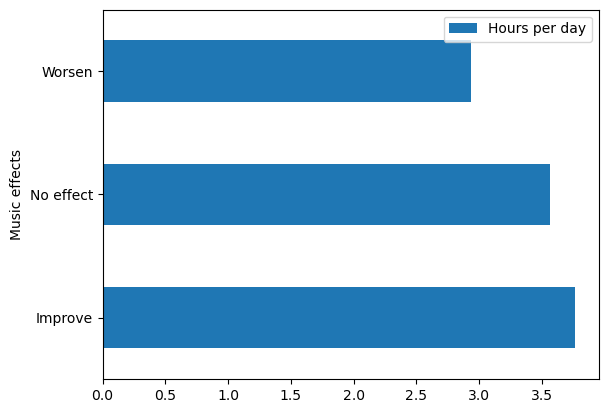

In [34]:
# 1) What is the connection between **disease** (numerical) and **music use** (numerical/categorical)?
# Get "diseases" and "music use" in 1 plot
# Create a function with for loop?

# Get average 'Disease' (numerical) for every possible 'Music use' (numerical/categorical):
# - Hours per day (numerical)
# - While working (categorical)
# - Instrumentalist (categorical)
# - Composer (categorical)

# Anova test for cehcking relationship between categorical and numerical #ANOVA
# Test for checking relationship between numerical and numerical #LinearRegression?
data_mmh.groupby('Music effects').agg({"Hours per day": 'mean'}).plot.barh() 

# Test for checking relationship between categorical and categorical # Chi2
# Mussic effects (c) and 'Hours per day' (n)
# Mussic effects (c) and 'While working' (c)
# Mussic effects (c) and 'Instrumentalist'  (c)
# Mussic effects (c) and 'Composer'  (c)


# Get average 'Anxiety' (numerical) for every possible music use:
#data_mmh.groupby(['Hours per day']).agg({'Anxiety': 'mean'}).head()
#data_mmh.groupby(['While working']).agg({'Anxiety': 'mean'}).head()
#data_mmh.groupby(['Instrumentalist']).agg({'Anxiety': 'mean'}).head()
#data_mmh.groupby(['Composer']).agg({'Anxiety': 'mean'}).head()

# Get average 'Depression' (numerical) for every possible music use 
# data_mmh.groupby('Music effects').agg({"Anxiety": 'mean'})
# Get average 'Insomnia' (numerical) for every possible music use
# Get average 'OCD' (numerical) for every possible music use 

# Display
#display(data_mmh.groupby(['Hours per day']).agg({'Anxiety': 'mean'}).head())
#display(data_mmh.groupby(['While working']).agg({'Anxiety': 'mean'}).head())
#display(data_mmh.groupby(['Instrumentalist']).agg({'Anxiety': 'mean'}).head())
#display(data_mmh.groupby(['Composer']).agg({'Anxiety': 'mean'}).head())

In [17]:
# Aggregate categorical vs categorical
# Use Pandas crosstab to create a contingency table (cross-tabulation)
#contingency_table = pd.crosstab(df['Category1'], df['Category2'])

musiceffects_ww = pd.crosstab(data_mmh['Music effects'], data_mmh['While working'])
musiceffects_ww

While working,No,Yes
Music effects,,
Improve,79,387
No effect,42,93
Worsen,5,10


<Axes: xlabel='While working', ylabel='Music effects'>

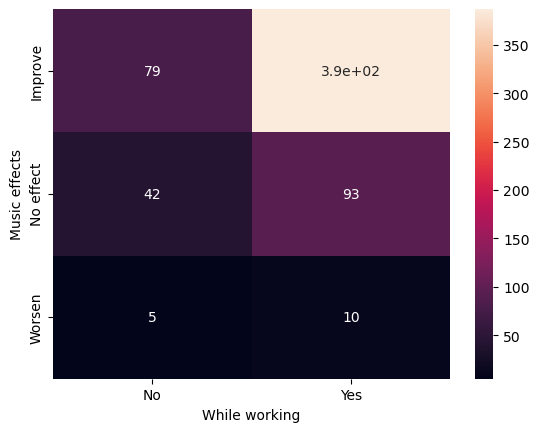

In [18]:
sns.heatmap(musiceffects_ww, annot=True)

In [22]:
# Mussic effects (c) and 'Instrumentalist' (c)
musiceffects_i = pd.crosstab(data_mmh['Music effects'], data_mmh['Instrumentalist'])
musiceffects_i

Instrumentalist,No,Yes
Music effects,,
Improve,303,163
No effect,102,33
Worsen,11,4


<Axes: xlabel='Instrumentalist', ylabel='Music effects'>

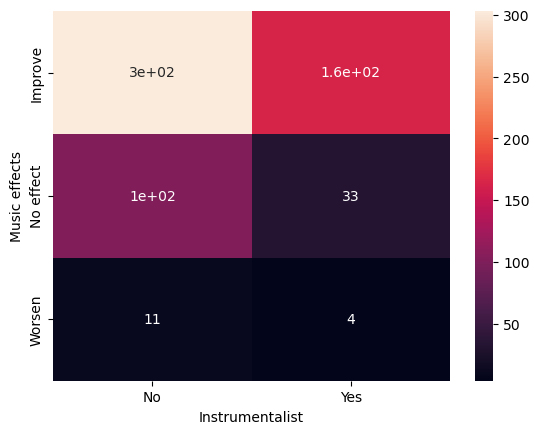

In [23]:
sns.heatmap(musiceffects_i, annot=True)

In [24]:
# Mussic effects (c) and 'Composer' (c)
musiceffects_c = pd.crosstab(data_mmh['Music effects'], data_mmh['Composer'])
musiceffects_c

Composer,No,Yes
Music effects,,
Improve,376,90
No effect,119,16
Worsen,13,2


<Axes: xlabel='Composer', ylabel='Music effects'>

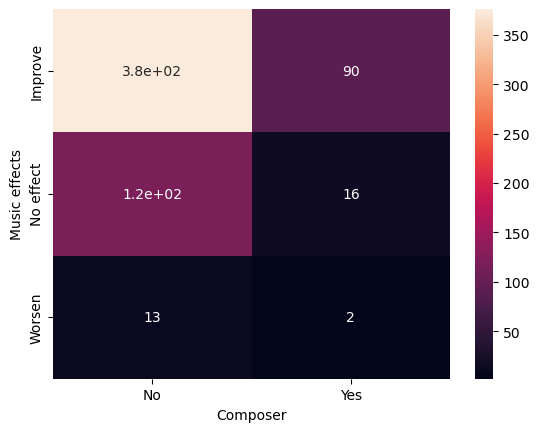

In [25]:
sns.heatmap(musiceffects_c, annot=True)

In [33]:
# create a function to aggregate multiple categorical vs categorical columns: --> Crosstab function in Pandas

import pandas as pd

def aggregate_categorical_vs_categorical(data, categorical_columns):
    """
    Aggregates multiple categorical vs. categorical columns and creates contingency tables.

    Args:
    data (pandas.DataFrame): The DataFrame containing the data.
    categorical_columns (list): A list of column names representing categorical variables.

    Returns:
    dict: A dictionary where keys are pairs of categorical columns, and values are the corresponding contingency tables.
    """
    results = {}

    for i in range(len(categorical_columns) - 1):
        for j in range(i + 1, len(categorical_columns)):
            col1 = categorical_columns[i]
            col2 = categorical_columns[j]
            contingency_table = pd.crosstab(data[col1], data[col2])
            results[f"{col1} vs {col2}"] = contingency_table

    return results

# Sample data
data = data_mmh
#data = {
#   'Category1': ['A', 'A', 'B', 'B', 'A', 'C'],
#    'Category2': ['X', 'Y', 'Y', 'X', 'Z', 'Z'],
#    'Category3': ['High', 'Low', 'High', 'High', 'Low', 'Low']
#}

# Create a Pandas DataFrame
df = pd.DataFrame(data_mmh)

# List of categorical columns
categorical_columns = ['Music effects', 'While working']

# Aggregate the data
aggregated_data = aggregate_categorical_vs_categorical(df, categorical_columns)

# Access and display contingency tables
for key, contingency_table in aggregated_data.items():
    print(f"Contingency Table for {key}:\n{contingency_table}\n")
 

Contingency Table for Music effects vs While working:
While working  No  Yes
Music effects         
Improve        79  387
No effect      42   93
Worsen          5   10



In [31]:
contingency_table

While working,No,Yes
Music effects,,
Improve,79,387
No effect,42,93
Worsen,5,10


TypeError: 'Axes' object is not subscriptable

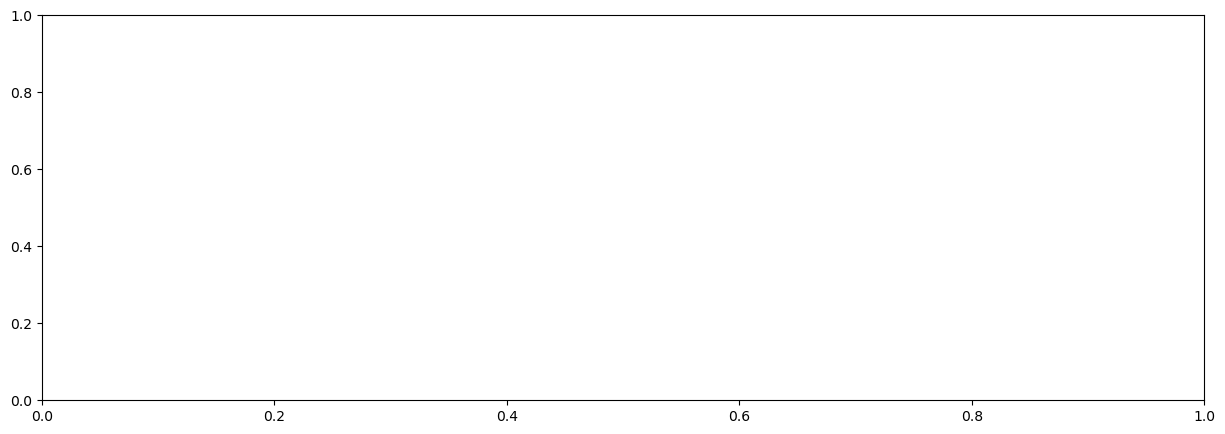

In [35]:
#create a function to aggregate multiple categorical vs categorical columns and plot it into a heatmap:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def aggregate_and_plot_categorical_heatmap(df, categorical_columns):
    """
    Aggregates multiple categorical vs. categorical columns and plots the results as a heatmap.

    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    categorical_columns (list): A list of column names representing categorical variables.

    Returns:
    None
    """
    results = {}
    
    for i in range(len(categorical_columns) - 1):
        col1 = categorical_columns[i]
        for j in range(i + 1, len(categorical_columns)):
            col2 = categorical_columns[j]
            contingency_table = pd.crosstab(df[col1], df[col2])
            results[f"{col1} vs {col2}"] = pd.DataFrame(contingency_table)

    # Create a heatmap for each contingency table
    fig, axes = plt.subplots(1, len(results), figsize=(15, 5))

    for idx, (key, contingency_df) in enumerate(results.items()):
        ax = axes[idx]
        sns.heatmap(contingency_df, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
        ax.set_title(f'Contingency Table for {key}')

    plt.tight_layout()
    plt.show()

# Sample data
data = data_mmh
#data = {
#    'Category1': ['A', 'A', 'B', 'B', 'A', 'C'],
#    'Category2': ['X', 'Y', 'Y', 'X', 'Z', 'Z'],
#    'Category3': ['High', 'Low', 'High', 'High', 'Low', 'Low']
#}

# Create a Pandas DataFrame
df = pd.DataFrame(data_mmh)

# List of categorical columns
categorical_columns = ['Music effects', 'While working']

# Aggregate the data and plot it as a heatmap
aggregate_and_plot_categorical_heatmap(df, categorical_columns)



In [ ]:
# Get average 'Anxiety' (numerical) for every possible music use:
data_mmh.groupby(['Hours per day']).agg({'Anxiety': 'mean', }).head()

# Get average 'Anxiety' (numerical) for every possible music use:
data_mmh.groupby(['Hours per day']).agg({'Anxiety': 'mean'}).head()
data_mmh.groupby(['While working']).agg({'Anxiety': 'mean'}).head()
data_mmh.groupby(['Instrumentalist']).agg({'Anxiety': 'mean'}).head()
data_mmh.groupby(['Composer']).agg({'Anxiety': 'mean'}).head()

# Get average 'Depression' (numerical) for every possible music use 
# Get average 'Insomnia' (numerical) for every possible music use
# Get average 'OCD' (numerical) for every possible music use 

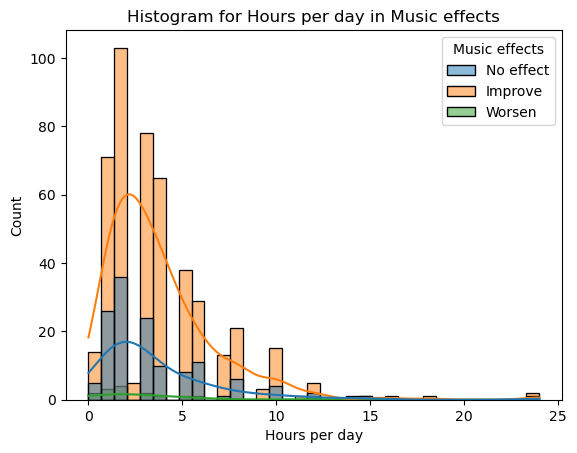

In [69]:
# Histplot 2:
#Function for a for loop for making a histoplot with categorical and numerical columns:

# Get average 'Disease' (numerical) for every possible 'Music use' (numerical/categorical):

def plot_categorical_histograms(data_mmh, categorical_column, numerical_column):
    categories = data_mmh[categorical_column].unique()
    
    sns.histplot(data=data_mmh, x=numerical_column, hue=categorical_column, kde=True)
    plt.title(f'Histogram for {numerical_column} in {categorical_column}')
    plt.show()

# Example data
data = data_mmh

# Call the function to plot histograms
plot_categorical_histograms(data_mmh, 'Music effects', 'Hours per day')


### 2) Connection **disease** and **music preference**:
___________________

In [ ]:
# 2) What is the connection between **disease** (numerical) and **music preference** (numerical/categorical)? 

# Get "diseases" and "music preference" in 1 plot
# Create a function with for loop?

# Get average 'Music effects'(c) for every possible 'Music preference' (numerical/categorical):
# - Favorite genre (categorical)
# - Exploratory (categorical)
# - Foreign languages (categorical)
# - BPM (numerical) (Drop this one)


musiceffects_fg = pd.crosstab(data_mmh['Music effects'], data_mmh['Favorite genre'])
musiceffects_fg 

musiceffects_e = pd.crosstab(data_mmh['Music effects'], data_mmh['Exploratory'])
musiceffects_e 

musiceffects_fl = pd.crosstab(data_mmh['Music effects'], data_mmh['Foreign languages'])
musiceffects_fl 

data_mmh.groupby('Music effects').agg({"BPM": 'mean'})



In [45]:
musiceffects_fg = pd.crosstab(data_mmh['Music effects'], data_mmh['Favorite genre'])
musiceffects_fg 

Favorite genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
Music effects,,,,,,,,,,,,,,,,
Improve,26,18,30,20,4,28,16,17,1,10,57,75,22,15,107,20
No effect,11,3,6,5,0,4,3,4,1,0,20,20,8,4,35,11
Worsen,1,0,0,0,0,0,0,0,0,0,0,2,0,1,7,4


In [46]:
musiceffects_e = pd.crosstab(data_mmh['Music effects'], data_mmh['Exploratory'])
musiceffects_e 

Exploratory,No,Yes
Music effects,,
Improve,107,359
No effect,52,83
Worsen,6,9


In [47]:
musiceffects_fl = pd.crosstab(data_mmh['Music effects'], data_mmh['Foreign languages'])
musiceffects_fl 

Foreign languages,No,Yes
Music effects,,
Improve,202,264
No effect,60,75
Worsen,7,8


In [48]:

data_mmh.groupby('Music effects').agg({"BPM": 'mean'})

,BPM
Music effects,
Improve,123.613734
No effect,123.740741
Worsen,118.533333


### 3) Connection **disease** and **music genres**:
___________________

In [50]:
# 3) What is the connection between **disease** (numerical) and **music genres** (categorical) ?

# Get "diseases" and "Music genres" in 1 plot
# Create a function with for loop?

# Get 'Music effects'(c) for every possible 'Music genre' (categorical):
# - Favorite genre (categorical)

# Frequency [Genre] (categorical):
# - Frequency [Classical] x            
# - Frequency [Country]     x          
# - Frequency [EDM]      x             
# - Frequency [Folk]    x              
# - Frequency [Gospel]   x            
# - Frequency [Hip hop]  x             
# - Frequency [Jazz]   x               
# - Frequency [K pop]  x             
# - Frequency [Latin] x                
# - Frequency [Lofi]  x                
# - Frequency [Metal]  x            
# - Frequency [Pop]   x             
# - Frequency [R&B]  x                 
# - Frequency [Rap]                  
# - Frequency [Rock]                
# - Frequency [Video game music]

musiceffects_fg = pd.crosstab(data_mmh['Music effects'], data_mmh['Favorite genre'])
musiceffects_fg 

musiceffects_fcl = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Classical]'])
musiceffects_fcl

musiceffects_fco = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Country]'])
musiceffects_fco

musiceffects_fedm = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [EDM]'])
musiceffects_fedm

musiceffects_ff = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Folk]'])
musiceffects_ff

musiceffects_fgo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Gospel]'])
musiceffects_fgo

musiceffects_fhh = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Hip hop]'])
musiceffects_fhh

musiceffects_fja = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Jazz]'])
musiceffects_fja

musiceffects_fkp = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [K pop]'])
musiceffects_fkp

musiceffects_fla = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Latin]'])
musiceffects_fla

musiceffects_flo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Lofi]'])
musiceffects_flo

musiceffects_fme = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Metal]'])
musiceffects_fme

musiceffects_fpo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Pop]'])
musiceffects_fpo

musiceffects_frb = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [R&B]'])
musiceffects_frb

musiceffects_fra = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Rap]'])
musiceffects_fra

musiceffects_fro = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Rock]'])
musiceffects_fro

musiceffects_fvgm = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Video game music]'])
musiceffects_fvgm

# - Frequency [Rap]   x               
# - Frequency [Rock]      x          
# - Frequency [Video game music]x

Frequency [Video game music],Never,Rarely,Sometimes,Very frequently
Music effects,,,,
Improve,142,131,129,64
No effect,46,38,26,25
Worsen,5,2,3,5


### 4) Connection **disease** and **greatest music effects**:
___________________

In [ ]:
# 4) Which **disease** (numerical) experiences the **greatest effect** (categorical) from music? 
# Plot the difference between mental health and anxiety

# Get "diseases" and "Music effects" in 1 plot
# Create a function with for loop?

# Get 'Disease'(numerical) for 'Music effects' (categorical):
# - Music effects (categorical)



data_mmh.groupby('Music effects').agg({"BPM": 'mean'})

# Get average 'Anxiety'(numerical) for 'Music effects'(categorical):
data_mmh.groupby(['Music effects']).agg({'Anxiety': 'mean'})
# Get average 'Depression' (numerical) for every possible music use 
data_mmh.groupby(['Music effects']).agg({'Depression': 'mean'})
# Get average 'Insomnia' (numerical) for every possible music use
data_mmh.groupby(['Music effects']).agg({'Insomnia': 'mean'})
# Get average 'OCD' (numerical) for every possible music use 
data_mmh.groupby(['Music effects']).agg({'OCD': 'mean'})

# Display
display(data_mmh.groupby(['Music effects']).agg({'Anxiety': 'mean'}).head())
display(data_mmh.groupby(['Music effects']).agg({'Depression': 'mean'}).head())
display(data_mmh.groupby(['Music effects']).agg({'Insomnia': 'mean'}).head())
display(data_mmh.groupby(['Music effects']).agg({'OCD': 'mean'}).head())

### 5) Connections **disease** and **age**:
___________________

In [ ]:
# 5) What **age** (numerical) experiences the most the **diseases** (numerical). (Make age categories?)
# What is their **music effect** (categorical)? 
# What **music** do they listen to (categorical)? 
# How do they listen to music (numerical/categorical)?

# Get "diseases" and "age" in 1 plot
# Get "diseases" and "age" and "music effects" in 1 plot
# Get "diseases" and "age" and "music preference" in 1 plot
# Get "diseases" and "age" and "music use" in 1 plot
# Create a function with for loop?

# What 'Age'(numerical) experiences the most 'Diseases' (numerical):
# - Anxiety
# - Depression
# - Insomnia
# - OCD
# Create groups of ages: 20's, 30's, 40's,...; pd.cut()

# Get 'Age' (numerical) for every possible 'Disease':
# Get 'Age' (numerical) for 'Anxiety':
data_mmh.groupby(['Age']).agg({'Anxiety': 'mean'})
# Get 'Age' (numerical) for 'Depression':
data_mmh.groupby(['Age']).agg({'Depression': 'mean'})
# Get 'Age' (numerical) for 'Insomnia':
data_mmh.groupby(['Age']).agg({'Insomnia': 'mean'})
# Get 'Age' (numerical) for 'OCD':
data_mmh.groupby(['Age']).agg({'OCD': 'mean'})

data_mmh.groupby(['Age']).agg({'Anxiety': 'mean'})

pd.cut(np.array([1, 7, 5, 4, 6, 3]),
       3, labels=["bad", "medium", "good"])


# Display
display(data_mmh.groupby(['Age']).agg({'Anxiety': 'mean'}).head())
display(data_mmh.groupby(['Age']).agg({'Depression': 'mean'}).head())
display(data_mmh.groupby(['Age']).agg({'Insomnia': 'mean'}.head())
display(data_mmh.groupby(['Age']).agg({'OCD': 'mean'}).head())
        
# What 'Age'(numerical) experiences the most 'Diseases' (numerical) and what is their 'Music effects (categorical)'
# Get "diseases" and "age" and "music effects" in 1 plot
# - Anxiety
# - Depression
# - Insomnia
# - OCD

# - Music effects (c)

        
# What 'Age'(numerical) experiences the most 'Diseases' (numerical) and what is their 'Music preference'(cat/num)
# Get "diseases" and "age" and "music preference" in 1 plot
# - Anxiety
# - Depression
# - Insomnia
# - OCD

# - Music genre (c)
# - Frequency [Genres] (c)
# - BPM (n)
# Exploratory (c)
# Foreign languages (c)

        
# What 'Age'(numerical) experiences the most 'Diseases' (numerical) and what is their 'Music use'(cat/num)
# Get "diseases" and "age" and "music use" in 1 plot
# - Anxiety 
# - Depression
# - Insomnia
# - OCD

# - Hours per day (n)
# - While working (c)
# - Instrumentalist (c)
# - Composer (c)

In [51]:
# Aggregate_numerical_vs_numerical
# Calculate the correlation coefficient

#correlation = df['Variable1'].corr(df['Variable2'])
#print(f'Correlation coefficient: {correlation}')

# Calculate the correlation coefficient
correlation = data_mmh['Age'].corr(df['Anxiety'])
print(f'Correlation coefficient: {correlation}')



Correlation coefficient: -0.19516395086552712


A correlation value close to 1 indicates a strong positive linear relationship, close to -1 indicates a strong negative linear relationship, and close to 0 suggests little to no linear relationship.

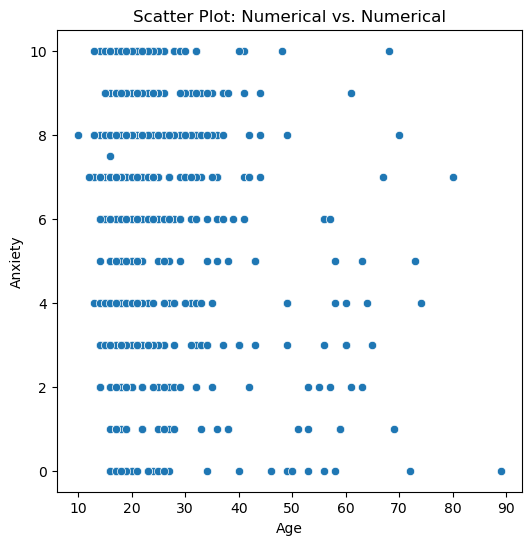

In [53]:
# Create a scatter plot
#plt.figure(figsize=(6, 6))
#sns.scatterplot(x='Variable1', y='Variable2', data=df)
#plt.xlabel('Variable1')
#plt.ylabel('Variable2')
#plt.title('Scatter Plot: Numerical vs. Numerical')
#plt.show()

# Create a scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Age', y='Anxiety', data=data_mmh)
plt.xlabel('Age')
plt.ylabel('Anxiety')
plt.title('Scatter Plot: Numerical vs. Numerical')
plt.show()

In [62]:
# Create a linear regression model
#model = LinearRegression()
#X = df[['Variable1']]
#y = df['Variable2']
#model.fit(X, y)

# Access regression coefficients
#slope = model.coef_[0]
#intercept = model.intercept_

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()
X = data_mmh[['Age']]
y = data_mmh['Anxiety']
model.fit(X, y)

# Access regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

In [ ]:
data_mmh.groupby(['Age']).agg({'Anxiety': 'mean'})

### 6) Can I make helpful recommendations based on these findings? 
___________________